# Import and Construct Dataset

In [183]:
# Import
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import time

In [159]:
# Construct Data
root_dir: str = "data//"
file_ext: str = ".csv"
delimiter: str = ","


def get_path(file_name: str) -> str:
    return root_dir + file_name + file_ext


def save_csv(file_name, data: np.ndarray, delimiter):
    frame = pd.DataFrame(data)
    frame.to_csv(get_path(file_name), index=False, sep=delimiter,
                 float_format="%.17f")


def read_csv(file_name, delimiter) -> np.ndarray:
    return np.genfromtxt(get_path(file_name), delimiter=delimiter)[1:]


def construct_dataset():
    m = 150  # data rows
    d = 75  # feature dimensions
    X: np.ndarray = np.random.rand(m, d)

    theta = np.zeros(shape=(d, 1))

    theta[:10] = np.array([10 if np.random.randint(0, 2) == 0 else -10 for _ in range(10)]).reshape((10, 1))

    epsilon = np.random.normal(loc=0, scale=0.1, size=(m, 1))

    y: np.ndarray = np.dot(X, theta) + epsilon

    save_csv("X_train", X[:80], delimiter=delimiter)
    save_csv("X_validation", X[80:100], delimiter=delimiter)
    save_csv("X_test", X[100:], delimiter=delimiter)
    save_csv("Y_train", y[:80], delimiter=delimiter)
    save_csv("Y_validation", y[80:100], delimiter=delimiter)
    save_csv("Y_test", y[100:], delimiter=delimiter)
    save_csv("Origin_theta", theta, delimiter=delimiter)

In [160]:
# Reload data
construct_dataset()
X_train: np.ndarray = read_csv("X_train", delimiter=delimiter)
X_valid: np.ndarray = read_csv("X_validation", delimiter=delimiter)
X_test: np.ndarray = read_csv("X_test", delimiter=delimiter)
y_train: np.ndarray = read_csv("Y_train", delimiter=delimiter)
y_valid: np.ndarray = read_csv("Y_validation", delimiter=delimiter)
y_test: np.ndarray = read_csv("Y_test", delimiter=delimiter)
origin_theta: np.ndarray = read_csv("Origin_theta", delimiter=delimiter)

# Ridge Regression

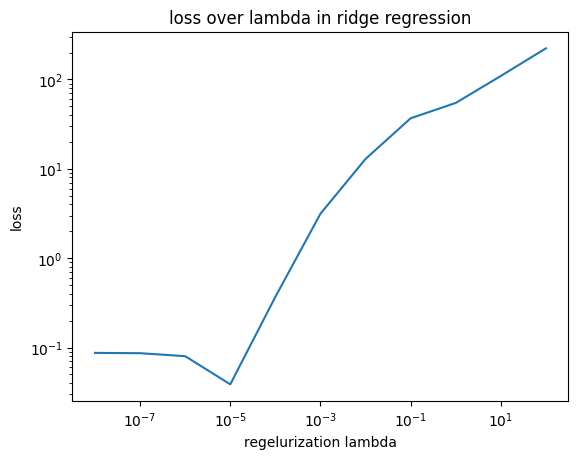

Choose lambda: 1e-05 		 min loss: 0.038756157295944296
True zero component number is 0, component smaller than 0.001 is 36, over 75 component
----------------
final theta by ridge regression is: 
 [-1.00669875e+01  9.99048451e+00  1.00581023e+01  9.96790978e+00
  9.98378104e+00  1.00903399e+01  9.97811413e+00 -9.82803134e+00
 -9.99286346e+00  1.01992064e+01  7.36955778e-03  1.20814149e-01
 -1.83929675e-02  6.90596761e-02 -1.73710915e-01  2.33854982e-03
 -6.50656547e-02  7.26566720e-02  2.24123548e-02 -9.15567746e-02
  1.04819340e-01 -1.55851304e-02 -5.61461703e-02 -9.67911697e-03
  1.06058312e-01  2.89555208e-02 -7.28535254e-02  2.59701249e-02
 -2.62084231e-02  1.43849955e-01 -3.53616749e-02 -1.75473461e-01
 -7.51922238e-02  1.35459169e-01 -8.91451617e-02  4.00378153e-03
  3.40823811e-01  5.60312488e-02  1.38556088e-02 -1.36157164e-01
  5.44188584e-02 -3.31987338e-02 -1.14361459e-01  4.05963467e-02
  8.55518917e-02 -1.39128187e-01 -9.61777060e-02 -1.63676623e-01
 -1.66148362e-01  8.641

(0.038756157295944296,
 array([-1.00669875e+01,  9.99048451e+00,  1.00581023e+01,  9.96790978e+00,
         9.98378104e+00,  1.00903399e+01,  9.97811413e+00, -9.82803134e+00,
        -9.99286346e+00,  1.01992064e+01,  7.36955778e-03,  1.20814149e-01,
        -1.83929675e-02,  6.90596761e-02, -1.73710915e-01,  2.33854982e-03,
        -6.50656547e-02,  7.26566720e-02,  2.24123548e-02, -9.15567746e-02,
         1.04819340e-01, -1.55851304e-02, -5.61461703e-02, -9.67911697e-03,
         1.06058312e-01,  2.89555208e-02, -7.28535254e-02,  2.59701249e-02,
        -2.62084231e-02,  1.43849955e-01, -3.53616749e-02, -1.75473461e-01,
        -7.51922238e-02,  1.35459169e-01, -8.91451617e-02,  4.00378153e-03,
         3.40823811e-01,  5.60312488e-02,  1.38556088e-02, -1.36157164e-01,
         5.44188584e-02, -3.31987338e-02, -1.14361459e-01,  4.05963467e-02,
         8.55518917e-02, -1.39128187e-01, -9.61777060e-02, -1.63676623e-01,
        -1.66148362e-01,  8.64139923e-02, -1.91462867e-01, -8.362

In [176]:
def ridge_regression_test(show_info: bool = True) -> [float, np.ndarray]:
    num_train_record, num_feature = X_train.shape
    num_test_record = X_test.shape[0]

    def ridge(Lambda):
        def ridge_obj(obj_theta):
            return ((np.linalg.norm(np.dot(X_train, obj_theta) - y_train)) ** 2) \
                   / (2 * num_train_record) + Lambda * (np.linalg.norm(obj_theta)) ** 2

        return ridge_obj

    def compute_loss(theta):
        return ((np.linalg.norm(np.dot(X_test, theta) - y_test)) ** 2) / (2 * num_test_record)

    w = np.random.rand(num_feature)

    min_lambda = 0
    min_loss = 1e100
    optimized_theta: np.ndarray
    lambda_list = []
    loss_list = []
    for i in range(-8, 3):
        Lambda = 10 ** i
        w_opt = minimize(ridge(Lambda), w)
        loss = compute_loss(w_opt.x)
        if loss < min_loss:
            min_loss = loss
            optimized_theta = w_opt.x
            min_lambda = Lambda
        lambda_list.append(Lambda)
        loss_list.append(loss)

    if not show_info:
        return min_loss, optimized_theta

    plt.plot(lambda_list, loss_list)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("regelurization lambda")
    plt.ylabel("loss")
    plt.title("loss over lambda in ridge regression")
    plt.show()

    print("Choose lambda: {0} \t\t min loss: {1}".format(min_lambda, min_loss))

    true_zero_count = 0
    thresh_hold = 1e-3
    small_count = 0
    for ele in optimized_theta:
        if ele == 0:
            true_zero_count = true_zero_count + 1
        elif ele <= thresh_hold:
            small_count = small_count + 1
    print("True zero component number is {0}, "
          "component smaller than {1} is {2}, "
          "over {3} component"
          .format(true_zero_count,
                  thresh_hold,
                  small_count,
                  optimized_theta.shape[0]))

    print("----------------")
    print("final theta by ridge regression is: \n", optimized_theta)
    return min_loss, optimized_theta


ridge_regression_test()

# Coordinate Descent for Lasso Regression
Optimization Goal: $\hat{\theta}=argmin_{\theta\in R^{d}}\sum_{i=1}^{m}(\theta^{T}x_i-y_i)^2+\lambda ||\theta||_1$  
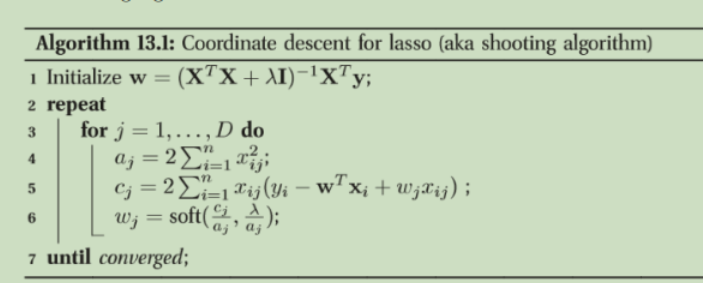  
$w\ is\ \theta$

In [155]:
def coordinate_descent_lasso(X: np.ndarray, y: np.ndarray,
                             lam_reg: float, tolerance: float = 1e-5,
                             max_step=1000) -> np.ndarray:
    def soft(a, delta):
        compo = abs(a) - delta
        if compo < 0:
            return 0
        return np.sign(a) * compo

    converge: bool = False
    current_step: int = 0
    N, D = X.shape
    theta = np.linalg.inv(np.dot(X.T, X) + (lam_reg * np.identity(D))) \
        .dot(X.T).dot(y)

    while (not converge) and (current_step < max_step):
        current_step = current_step + 1
        last_theta = np.copy(theta)
        for j in range(D):
            a_j = 0
            c_j = 0

            for i in range(N):
                x_ij = X[i, j]
                a_j += x_ij * x_ij
                c_j += X[i, j] * \
                    (y[i] - np.dot(theta.T, X[i]) + np.dot(theta[j], x_ij))

            c_j *= 2
            a_j *= 2
            theta[j] = soft(c_j / a_j, lam_reg / a_j)

        diff = np.sum(np.abs(theta - last_theta))
        converge = diff <= tolerance
        if (not converge) and (current_step % 100 != 0):
            continue
        print("\rlambda is {0:.1f}\t\tdiff is {1}\tsteps:{2}/{3}"
              .format(lam_reg, diff, current_step, max_step), end='')
    print("\r")

    return theta

## Compute square loss
$\mathcal{L}(X, y)=\frac{1}{N}\sum_{i=1}^{N}(X_i*\theta - y_i)^{2}$

In [8]:
def compute_square_loss(X: np.ndarray, y: np.ndarray, theta: np.ndarray) \
        -> float:

    N = X.shape[0]
    diff = X.dot(theta) - y
    loss = 1.0 / N * np.dot(diff.T, diff)
    return loss

## Find min loss
Find the lambda and theta of min square loss  
Can find that lasso's loss is less than ridge with the sparse input

lambda is 0.1		diff is 0.06008851755771311	steps:1000/1000
lambda is 0.2		diff is 0.06899627007686944	steps:1000/1000
lambda is 0.3		diff is 0.08325210089294723	steps:1000/1000
lambda is 0.4		diff is 0.09547926436898656	steps:1000/1000
lambda is 0.5		diff is 0.0648970367967063	steps:1000/1000
lambda is 0.6		diff is 0.04435037153736939	steps:1000/1000
lambda is 0.7		diff is 0.013912975533066193	steps:1000/1000
lambda is 0.8		diff is 0.0026355262109854036	steps:1000/1000
lambda is 0.9		diff is 0.0003978676094541049	steps:1000/1000
lambda is 1.0		diff is 5.149093572631713e-05	steps:1000/1000
min loss: 0.015307889774195045, lambda:0.7


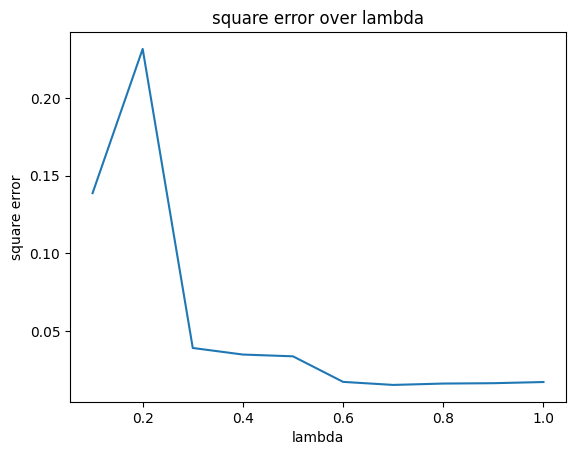

In [187]:
# return lambda and theta of minimized square loss error
def find_min_loss(X_train, y_train, X_valid, y_valid) -> [float, np.ndarray]:
    sqr_loss = []
    lambda_list = np.arange(0.1, 1.1, 0.1)
    min_loss = 1e100
    min_theta: np.ndarray = {}
    min_lambda: float = -1
    for lambda_reg in lambda_list:
        theta = coordinate_descent_lasso(X_train, y_train, lambda_reg)
        loss = compute_square_loss(X_valid, y_valid, theta)
        sqr_loss.append(loss)
        if min_loss > loss:
            min_loss = loss
            min_theta = np.copy(theta)
            min_lambda = lambda_reg

    print("min loss: {0}, lambda:{1:.1f}".format(min_loss, min_lambda))
    plt.plot(lambda_list, sqr_loss)
    plt.xlabel("lambda")
    plt.ylabel("square error")
    plt.title("square error over lambda")
    plt.show()
    return min_lambda, min_theta


min_lambda, min_theta = find_min_loss(X_train, y_train, X_valid, y_valid)

### Find how many true zero

In [173]:
def find_true_zero_count(origin_theta: np.ndarray,
                         min_theta: np.ndarray) -> [int, int]:
    origin_count = 0
    min_count = 0
    for ele in origin_theta:
        if abs(ele) <= 1e-5:
            origin_count += 1
    for ele in min_theta:
        if abs(ele) <= 1e-5:
            min_count += 1
    return origin_count, min_count


origin_count, min_count = find_true_zero_count(origin_theta, min_theta)
print("origin theta has {0} true zero, theta of min loss's lambda has "
      "{1} true zero with tolerance: {2}\n"
      "{3} zero component are estimated as non-zero"
      .format(origin_count, min_count, 1e-5, origin_count - min_count))

origin theta has 65 true zero, theta of min loss's lambda has 53 true zero with tolerance: 1e-05
12 zero component are estimated as non-zero


## Homotopy Method
Warm start with ridge regression should let lasso converge more quickly

In [182]:
def warm_start_coordinate_descent(X: np.ndarray, y: np.ndarray,
                                  lam_reg: float, tolerance: float = 1e-3,
                                  max_step=1000) -> np.ndarray:
    def soft(a, delta):
        compo = abs(a) - delta
        if compo < 0:
            return 0
        return np.sign(a) * compo

    converge: bool = False
    current_step: int = 0
    N, D = X.shape
    _, theta = ridge_regression_test(False)

    while (not converge) and (current_step < max_step):
        current_step = current_step + 1
        last_theta = np.copy(theta)
        for j in range(D):
            a_j = 0
            c_j = 0

            for i in range(N):
                x_ij = X[i, j]
                a_j += x_ij * x_ij
                c_j += X[i, j] * \
                    (y[i] - np.dot(theta.T, X[i]) + np.dot(theta[j], x_ij))

            c_j *= 2
            a_j *= 2
            theta[j] = soft(c_j / a_j, lam_reg / a_j)

        diff = np.sum(np.abs(theta - last_theta))
        converge = diff <= tolerance
        if (not converge) and (current_step % 100 != 0):
            continue
        print("\rlambda is {0:.1f}\t\tdiff is {1}\tsteps:{2}/{3}"
              .format(lam_reg, diff, current_step, max_step), end='')
    print("\r")

    return theta


def find_min_loss_warm_start(X_train, y_train, X_valid, y_valid) \
                        -> [float, np.ndarray]:
    sqr_loss = []
    lambda_list = np.arange(0.1, 1.1, 0.1)
    min_loss = 1e100
    min_theta: np.ndarray = {}
    min_lambda: float = -1
    for lambda_reg in lambda_list:
        theta = warm_start_coordinate_descent(X_train, y_train, lambda_reg)
        loss = compute_square_loss(X_valid, y_valid, theta)
        sqr_loss.append(loss)
        if min_loss > loss:
            min_loss = loss
            min_theta = np.copy(theta)
            min_lambda = lambda_reg

    print("min loss: {0}, lambda:{1:.1f}".format(min_loss, min_lambda))
    return min_lambda, min_theta


_, _ = find_min_loss_warm_start(X_train, y_train, X_valid, y_valid)

lambda is 0.1		diff is 0.0009953931916886843	steps:835/1000
lambda is 0.2		diff is 0.000988153783945539	steps:700/10000
lambda is 0.3		diff is 0.000998791003312332	steps:576/10000
lambda is 0.4		diff is 0.0009936626477643623	steps:460/1000
lambda is 0.5		diff is 0.000993502247473554	steps:376/1000
lambda is 0.6		diff is 0.000989000375419477	steps:326/10000
lambda is 0.7		diff is 0.000989182650121108	steps:284/10000
lambda is 0.8		diff is 0.000982675865428887	steps:260/1000
lambda is 0.9		diff is 0.0009678978659599484	steps:222/1000
lambda is 1.0		diff is 0.0009944533872836038	steps:188/1000
min loss: 0.016342880999627007, lambda:0.9


## compare time between warm start and non warm start


lambda is 0.6		diff is 0.009898263871577587	steps:167/1000
lambda is 0.6		diff is 0.04435037153736939	steps:1000/1000
lambda is 0.7		diff is 0.009957528853492322	steps:148/1000
lambda is 0.7		diff is 0.013912975533067251	steps:1000/1000
lambda is 0.8		diff is 0.009924335276691317	steps:133/1000
lambda is 0.8		diff is 0.00980506755009518	steps:941/1000
lambda is 0.9		diff is 0.00911076495458803	steps:121/1000
lambda is 0.9		diff is 0.00997934261343577	steps:872/1000


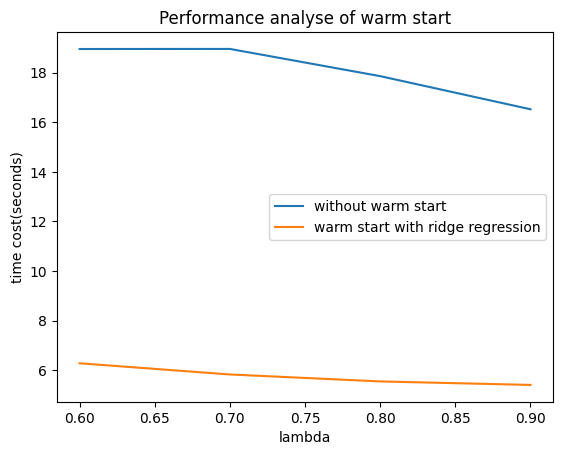

In [186]:
def compare():
    origin_time = []
    warm_start_time = []
    lambda_list = [0.6, 0.7, 0.8, 0.9]
    for lambda_reg in lambda_list:

        time_start = time.time()
        _ = warm_start_coordinate_descent(X_train, y_train, lambda_reg, tolerance=0.01)
        warm_start_time.append(time.time() - time_start)

        time_start = time.time()
        _ = coordinate_descent_lasso(X_train, y_train, lambda_reg, tolerance=0.01)
        origin_time.append(time.time() - time_start)

    plt.plot(lambda_list, origin_time, label="without warm start")
    plt.plot(lambda_list, warm_start_time, label="warm start with ridge regression")
    plt.legend()
    plt.xlabel("lambda")
    plt.ylabel("time cost(seconds)")
    plt.title("Performance analyse of warm start")
    plt.show()


compare()

## vectorize coordinate descent
Vectorie computation procedure by transfering it to matrix computation will improve performance significantly  
Improve around 18x ~ 36x compared with above  
$$c_j=2\sum_{i=1}^{n}x_{ij}(y_i-\theta^{T}x_i+\theta_jx_{ij})=2[x_j\cdot y - (x\theta)\cdot x_j+\theta_j||x_j||_2^2]$$

loss of ridge regression with optimized lambda is 0.0387
lambda is 0.5	steps:1845/10000		run time:1.0552 seconds loss:0.0177
lambda is 0.5	steps:793/10000		run time:0.4571 seconds loss:0.0177
lambda is 0.6	steps:1608/10000		run time:0.9302 seconds loss:0.0170
lambda is 0.6	steps:473/10000		run time:0.2681 seconds loss:0.0170
lambda is 0.7	steps:1451/10000		run time:0.8382 seconds loss:0.0165
lambda is 0.7	steps:393/10000		run time:0.2231 seconds loss:0.0165
lambda is 0.8	steps:1327/10000		run time:0.7582 seconds loss:0.0164
lambda is 0.8	steps:370/10000		run time:0.2100 seconds loss:0.0164
lambda is 0.9	steps:1157/10000		run time:0.6571 seconds loss:0.0164
lambda is 0.9	steps:263/10000		run time:0.1490 seconds loss:0.0164
lambda is 1.0	steps:1061/10000		run time:0.6041 seconds loss:0.0172
lambda is 1.0	steps:203/10000		run time:0.1160 seconds loss:0.0172


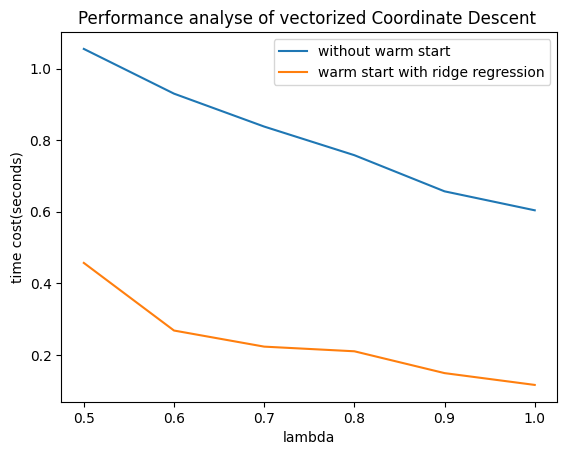

In [208]:
def coordinate_descent_lasso_vectorize(X: np.ndarray, y: np.ndarray,
                                       theta: np.ndarray = None,
                                       lam_reg: float = 0.7,
                                       tolerance: float = 1e-5,
                                       max_step=10000) -> np.ndarray:
    def soft(a, delta):
        return np.sign(a)*max(abs(a) - delta, 0)

    time_start = time.time()

    converge: bool = False
    current_step: int = 0
    N, D = X.shape
    if theta is None:
        theta = np.linalg.inv(np.dot(X.T, X) + (lam_reg * np.identity(D))) \
            .dot(X.T).dot(y)

    while (not converge) and (current_step < max_step):
        current_step = current_step + 1
        last_theta = np.copy(theta)

        for j in range(D):
            aj = 2*np.dot(X[:, j].T, X[:, j])
            cj = 2*(X[:, j].dot(y) - (np.dot(X, theta).dot(X[:, j]))
                    + theta[j]*(X[:, j].T.dot(X[:, j])))
            theta[j] = soft(cj/aj, lam_reg/aj)

        diff = np.sum(np. abs(theta - last_theta))
        converge = diff <= tolerance
        if (not converge) and (current_step % 100 != 0):
            continue
        print("\rlambda is {0:.1f}\t"
              "steps:{1}/{2}\t\trun time:{3:.4f} seconds loss:{4:.4f}"
              .format(lam_reg, current_step,
                      max_step, time.time()-time_start,
                      compute_square_loss(X_valid, y_valid, theta)), end='')
    print("\r")

    return theta


def compare_with_vectorize():
    ridge_loss, ridge_theta = ridge_regression_test(show_info=False)
    print("loss of ridge regression with optimized lambda is {0:.4f}"
          .format(ridge_loss))
    lam_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    warm_start_cost = []
    non_warm_start_cost = []
    for lam_reg in lam_list:
        # without warm start
        start_time = time.time()
        coordinate_descent_lasso_vectorize(X_train, y_train, None, lam_reg)
        non_warm_start_cost.append(time.time() - start_time)
        # with warm start
        start_time = time.time()
        coordinate_descent_lasso_vectorize(X_train, y_train,
                                           ridge_theta, lam_reg)
        warm_start_cost.append(time.time() - start_time)

    plt.plot(lam_list, non_warm_start_cost, label="without warm start")
    plt.plot(lam_list, warm_start_cost, label="warm start with ridge regression")
    plt.legend()
    plt.xlabel("lambda")
    plt.ylabel("time cost(seconds)")
    plt.title("Performance analyse of vectorized Coordinate Descent ")
    plt.show()


compare_with_vectorize()

# Derive Coordinate Descent
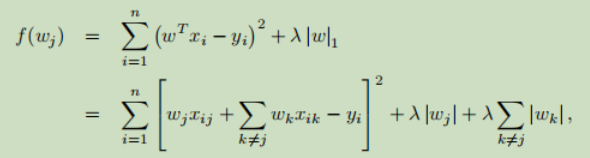
## Q1  
if $x=\vec{0},w=\vec{0}$
## Q2
define:  
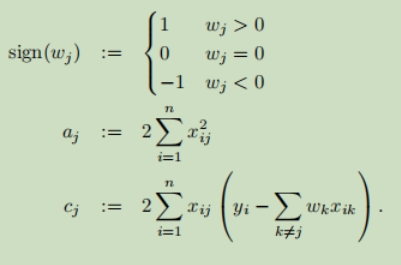
$$let\ d(\theta_j)=\frac{\partial f(\theta_j)}{\partial \theta_j}=(a_j \theta_j -c_j)+\lambda \frac{|\theta_j|}{\partial \theta_j} \ = a_j \theta_j-c_j+sign(\theta_j)\lambda,\ \theta=w$$  
## Q3
if $\theta_j \gt 0$, then $d(\theta_j)=a_j\theta_j-c_j+\lambda$. If f is convex then $d_(\theta_j)=0$ can minimize f, so that $argmin_{\theta_j}d(\theta_j)=\frac{c_j-\lambda}{a_j}=-\frac{1}{a_j}(\lambda-c_j)$  
condition of $\theta_j \lt 0$ is the same : $d(\theta_j)=\frac{1}{a_j}(\lambda+c_j)$ 
## Q4
